In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


1) Data Description

   The data consists of two csv files collected from Plaicraft and describe player information and activity:

   - players.csv
     - total of 196 observations
     - includes 9 variables:
       - experience (chr) - the experience level players identified with in a survey when registering
       - subscribe (lgl) - if the player is subscribed to the game
       - hashedEmail (chr) - the encrypted form of the players' emails
       - played_hours (dbl) - accumulated playing time for each player
       - name (chr) - random name selected by the player
       - gender (chr) - gender of the player
       - age (dbl) - age of player
       - individualid - ?
       - organizationName - ?
     - potential issues with the data:
       - the dataset includes vectors that don't make much sense; for example organizationName could not be accessed
       - some variables may need to be in the wrong type; for example gender
       - the accuracy of the data could be questioned, as most variables are collect via survey
/
   - sessions.csv
     - total of 1535 observations
     - includes 5 variables:
       - hashedEmail (chr) - the encrypted form of the players' emails
       - start_time (chr) - the start time of a session
       - end_time (chr) - the end time of a session
       - original_start_time (dbl) - start time in UNIX timestamp format
       - original_ed_time (dbl) - end time in UNIX timestamp format
     - potential issues with the data:
       - the start time and end time are in <chr> formats, which may be hard to wrangle and analyse later

2) Question

The larger question my group will be focusing on is:
"We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."

To answer this question, we will likely have to use the "played_hours" variable in players.csv as a explanatory variable. To explore this variable, we could look at a number of response variables found in the dataset, such as "experience," "subscribe," "gender," and "age." But for the sake of this proposal, we will look at "age" as a response variable.

In order to make any analysis, we will also have to tidy the data by eliminating variables that don't play a role and also converting the types of the vectors into correct ones.

3) Exploartory Data Analysis

In [16]:
# First we load both datasets into R
players <- read_csv("group_project/data/players.csv")

print(players, n = 5)


sessions <- read_csv("group_project/data/sessions.csv")

# A preview of the data shows us the types for each variable
# We will be using players in this proposal

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 196 × 9
  experience subscribe hashedEmail  played_hours name  gender   age individualId
  <chr>      <lgl>     <chr>               <dbl> <chr> <chr>  <dbl> <lgl>       
1 Pro        TRUE      f6daba428a5…         30.3 Morg… Male       9 NA          
2 Veteran    TRUE      f3c813577c4…          3.8 Chri… Male      17 NA          
3 Veteran    FALSE     b674dd7ee0d…          0   Blake Male      17 NA          
4 Amateur    TRUE      23fe711e0e3…          0.7 Flora Female    21 NA          
5 Regular    TRUE      7dc01f10bf2…          0.1 Kylie Male      21 NA          
# ℹ 191 more rows
# ℹ 1 more variable: organizationName <lgl>


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 196 × 2
    age played_hours
  <dbl>        <dbl>
1     9         30.3
2    17          3.8
3    17          0  
4    21          0.7
5    21          0.1
# ℹ 191 more rows


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


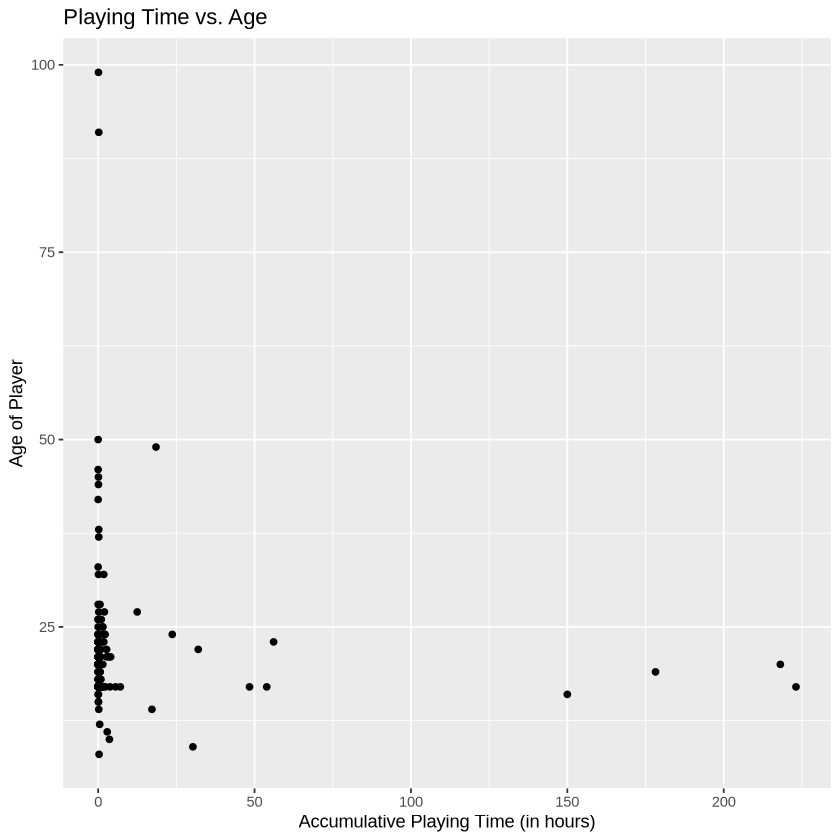

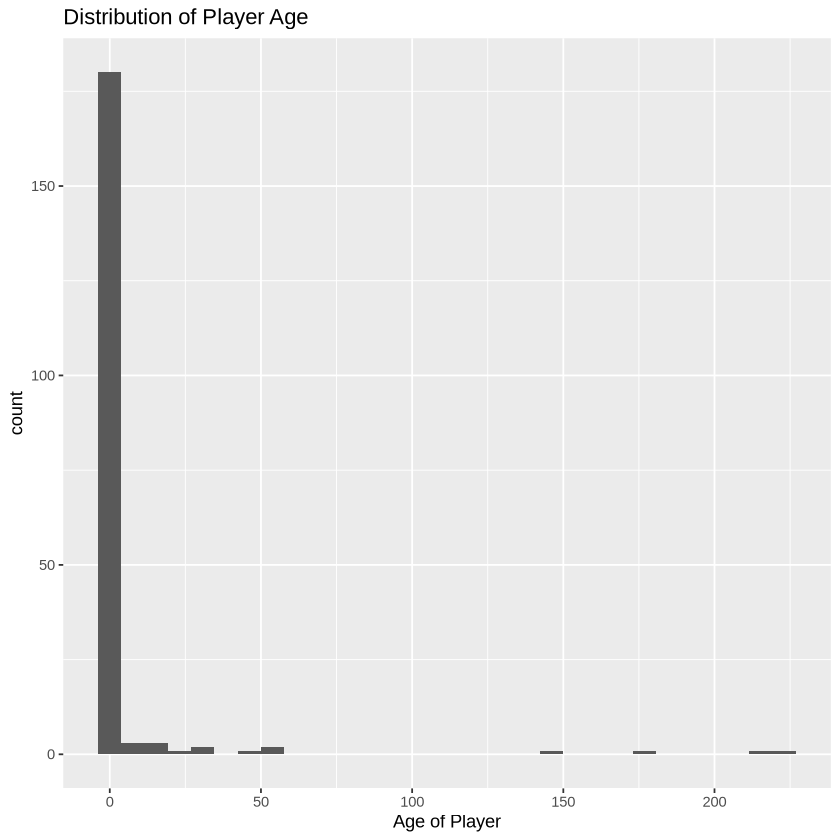

In [31]:
# To turn the data into a tidy format, we will eliminate irrelevant variables

players_tidy <- players |>
    select(age, played_hours) 

print(players_tidy, n = 5)


# Let's generate some plots to visualize the data


players_plot1 <- players_tidy |>
    ggplot(aes(x = played_hours, y = age)) +
        geom_point() +
        labs(x = "Accumulative Playing Time (in hours)", y = "Age of Player", title = "Playing Time vs. Age") 
        
players_plot1


players_plot2 <- players_tidy |>
    ggplot(aes(x = played_hours)) +
        geom_histogram() +
        labs(x = "Age of Player", title = "Distribution of Player Age")

players_plot2
# From these plots, we see that the data is not very well distributed, which may lead to poor analysis of trends. There also appears to be random errors in the data that should be wrangled out to conduct better analysis.

4) Methods and Plan

In order to address the question of interest, I think we could use KNN regression to model the dataset. I find this method to be the most appropriate, as the variable being predicted in this scenario is "age," which are numerical values. Using a regression model is highly suitable for numerical values compared to a classification model. Furthermore, the data appears to not exhibit a linear trend, which suggests that linear regression shouldn't be used, as KNN regression can better model non-linear, irregular trends. However, this is all based on the assumption that the data is what it appears to be in the visuals produced above. The KNN model may be weak in the sense that it doesn't predict as well as a linear regression model. The data will be split and trained before tested.